<a href="https://colab.research.google.com/github/FZenji/CSC3831-2021-22/blob/main/Image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1

First, I will check that all the libraries I plan to use are installed, imported, and working.

In [2]:
# scipy
import scipy
print('scipy: %s' % scipy.__version__)
# numpy
import numpy as np
print('numpy: %s' % np.__version__)
# matplotlib
import matplotlib
print('matplotlib: %s' % matplotlib.__version__)
# pandas
import pandas
print('pandas: %s' % pandas.__version__)
# statsmodels
import statsmodels
print('statsmodels: %s' % statsmodels.__version__)
# scikit-learn
import sklearn
print('sklearn: %s' % sklearn.__version__)

scipy: 1.7.3
numpy: 1.21.6
matplotlib: 3.2.2
pandas: 1.3.5
statsmodels: 0.12.2
sklearn: 1.0.2


In [3]:
# # theano
# import theano
# print('theano: %s' % theano.__version__)
# tensorflow
import tensorflow as tf
print('tensorflow: %s' % tf.__version__)
# keras
import keras
print('keras: %s' % keras.__version__)

tensorflow: 2.9.2
keras: 2.9.0


In [4]:
# Import the dataset

import tensorflow.keras.datasets as datasets                       
                                                                   
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 16s 0us/step


Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


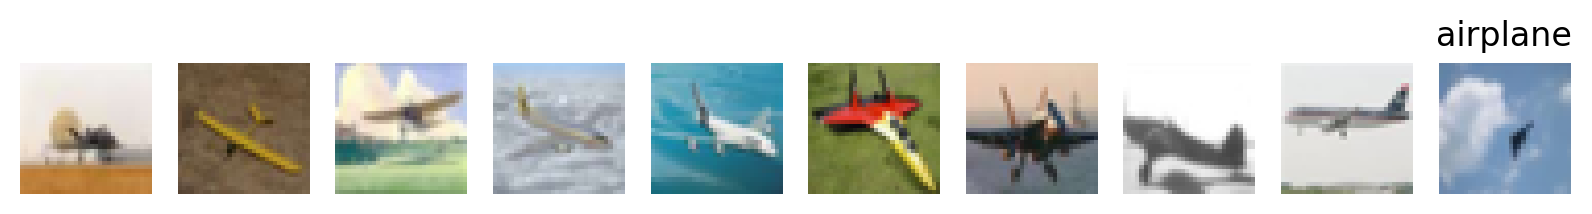

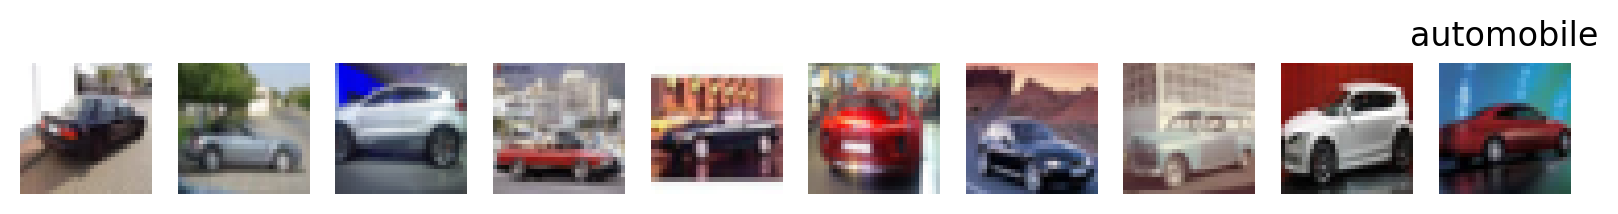

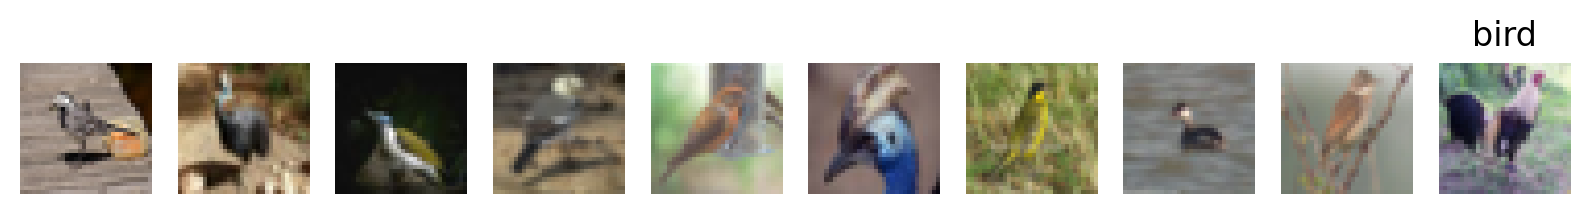

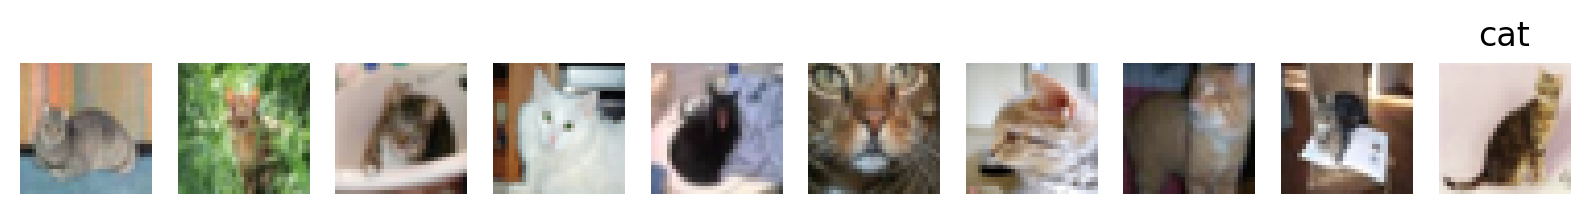

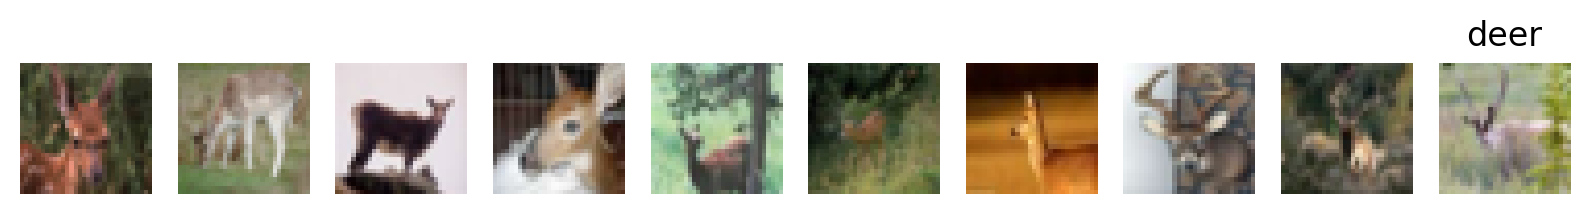

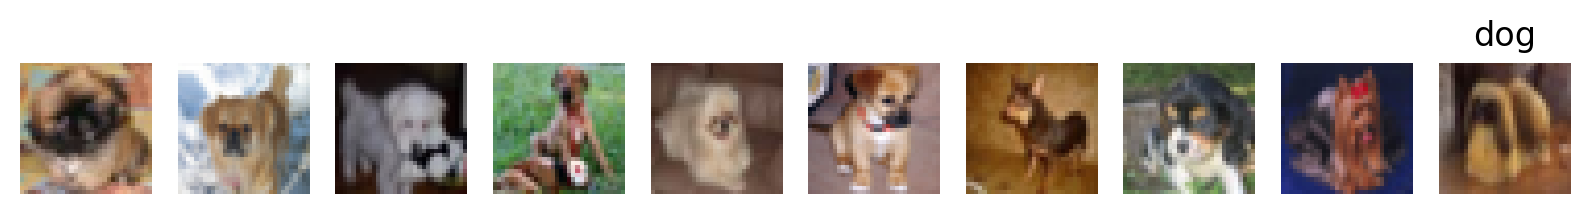

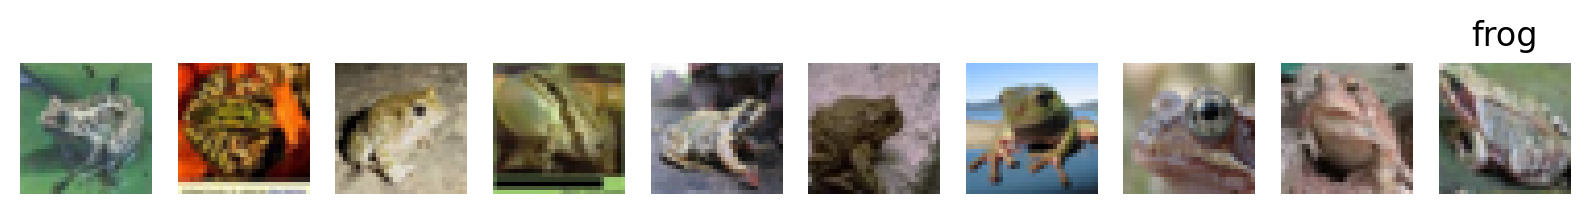

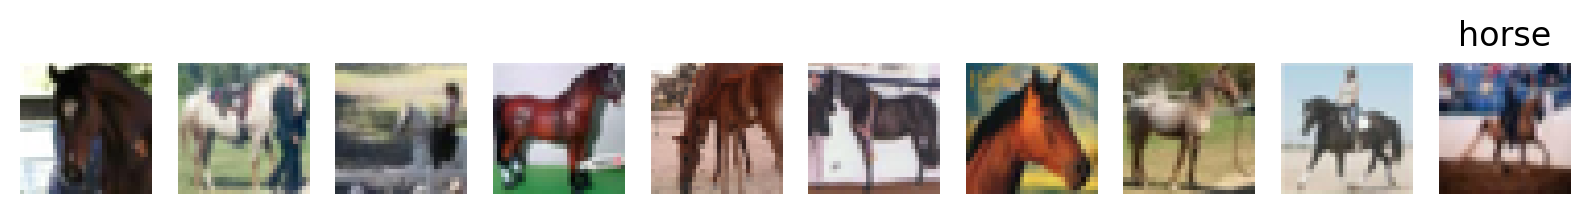

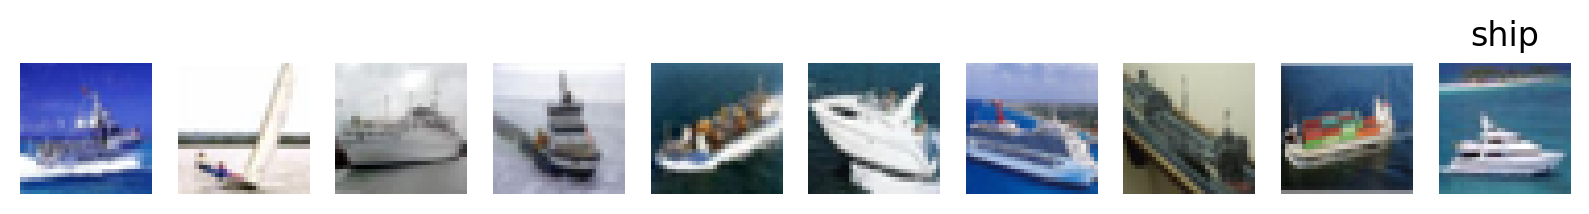

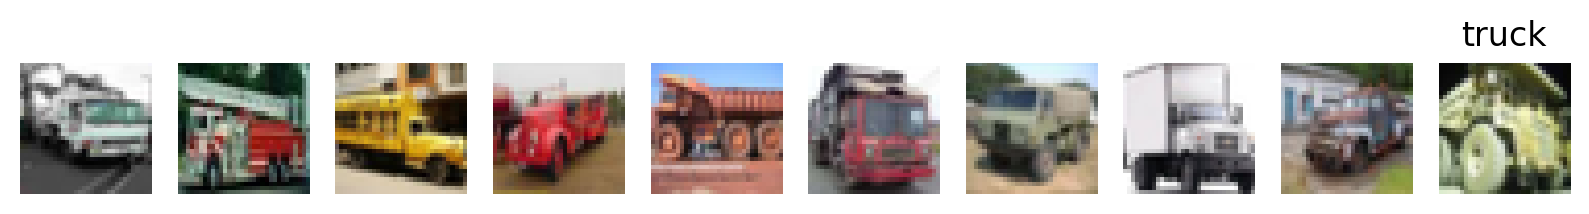

In [5]:
# Some code borrowed from Lab 5 Deep Learning.ipynb [https://ncl.instructure.com/courses/45231/files/6292965?wrap=1]
from matplotlib import pyplot as plt
from matplotlib import rcParams
from random import randint

# adjust figure sizes
plt.rcParams['figure.figsize'] = [10, 1]
plt.rcParams['figure.dpi'] = 200

# summarize loaded dataset
print(f'Train: X={X_train.shape}, y={y_train.shape}')
print(f'Test: X={X_test.shape}, y={y_test.shape}')

# names of the classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# dictionary to separate each class
classes = {0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}
# separate classes
for i in range(len(X_train)):
    classes[y_train[i][0]].append(X_train[i])

# plot first few images
for class_num in range(10):
    for i in range(10):

        # create a random integer each loop, so that the item at that index can be removed, so there are no duplicates
        random_index = randint(0, len(classes[class_num]))

        # define subplot
        plt.subplot(1, 10, 1 + i)

        # plot raw pixel data
        plt.imshow(classes[class_num][random_index])

        # delete the image from the dictionary to avoid repeats
        del classes[class_num][random_index]
        plt.axis('off')
        
    # show the figure
    plt.title(class_names[class_num])
    plt.show()

Above I am using the random python library to generate a random integer as an index in the respective dictionary class. I show this image and then remove it from the list. This is done so that there are no repeats, even if this is a very low chance. I originally used the random.choice() function which makes the code cleaner, but would allow for these unwanted repeats.

For my CNN, I will take inspiration from the classic LeNet, using average pooling and sigmoid activation.

In [6]:
# Scale the values to a range of 0 to 1

X_train = X_train / 255
X_test = X_test / 255

In [6]:
# Architecture for the LeNet model
basic_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=(3, 3), activation='sigmoid', input_shape=(32, 32, 3)),
    tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='sigmoid'),
    tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=120, activation='sigmoid'),
    tf.keras.layers.Dense(units=80, activation='sigmoid'),
    tf.keras.layers.Dense(units=10)
])

The basic model has been created, according to the LeNet specifications. Next we will compile the model, fit it and see the results.

In [7]:
# Compile using Adam, to get out of local minima
basic_model.compile(optimizer='adam', loss=keras.losses.MeanAbsoluteError(), metrics=['accuracy'])

# Fit the model to the data
basic_model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 15s 4ms/step - loss: 2.5248 - accuracy: 0.0994
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.5005 - accuracy: 0.0986
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.4980 - accuracy: 0.1004
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.5019 - accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.5027 - accuracy: 0.0994
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.4982 - accuracy: 0.0978
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.4989 - accuracy: 0.1001
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.5004 - accuracy: 0.1001
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.5001 - accuracy: 0.1015
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.49

In [8]:
# Test on the test data
test_loss, test_acc = basic_model.evaluate(X_test, y_test)

print(f'Test accuracy: {test_acc}\nTest loss: {test_loss}')

313/313 [==============================] - 1s 3ms/step - loss: 2.5019 - accuracy: 0.1000
Test accuracy: 0.10000000149011612
Test loss: 2.5018908977508545


The results here are very, very bad. An accuracy of only 10% means that it did about as well as randomly guessing to which class the images belong. Next I will add a softmax so we can give the model an image and it will tell us to which class it thinks it belongs.

In [9]:
# Get probabilities of each class
prob_model = tf.keras.Sequential([basic_model, tf.keras.layers.Softmax()])

predictions = prob_model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [8]:
# Function to produce the image, what it was predicted as, and the probaility distribution of that image
def make_prediction(index, images, labels, predictions):
    plt.figure(figsize=(4, 2))

    plt.subplot(1, 2, 1)
    plt.title(f"Predicted class: {class_names[np.argmax(predictions[index])]}")
    plt.imshow(images[index])
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.bar(range(10), predictions[0])
    plt.xticks(ticks=range(10), labels=class_names, rotation='vertical')
    plt.yticks([])
    plt.show()

In [ ]:
make_prediction(1, X_test, y_test, predictions)

With this function, I can now provide an index and get the image, what it was predicted as, and the probability distribution of the classes.

Next, I will make some improvements to the CNN architecture, by manually changing some values and then using the Keras hyperparameter tuning tool.

# Part 2

In [ ]:
!pip install keras_tuner

In [11]:
import keras_tuner

# Function to build the model so that is can be passed into the hyperparameter tuning
def build_model(hyper):

    # Parameters that will be tuned
    filter1_hyper = hyper.Choice('filter1', values=[32, 64])
    filter2_hyper = hyper.Choice('filter2', values=[96, 128])
    filter3_hyper = hyper.Choice('filter3', values=[192, 256])

    units_hyper = hyper.Choice('units', values=[2048, 4096])

    learning_rate_hyper = hyper.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    # Upgraded model architecture
    upgrade_model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(filters=filter1_hyper, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
        tf.keras.layers.Conv2D(filters=filter1_hyper, kernel_size=(3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        tf.keras.layers.Conv2D(filters=filter2_hyper, kernel_size=(3, 3), activation='relu', padding='same'),
        tf.keras.layers.Conv2D(filters=filter2_hyper, kernel_size=(3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        tf.keras.layers.Conv2D(filters=filter3_hyper, kernel_size=(3, 3), activation='relu', padding='same'),
        tf.keras.layers.Conv2D(filters=filter3_hyper, kernel_size=(3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=units_hyper, activation='relu'),
        tf.keras.layers.Dense(units=units_hyper, activation='relu'),
        tf.keras.layers.Dense(units=10, activation='softmax')
    ])

    # Compile and return the new upgraded architecture
    upgrade_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate_hyper), loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

    return upgrade_model

In [19]:
# Using the Hyperband tuner, there are 3 options
tuner = keras_tuner.Hyperband(build_model, objective='val_accuracy', max_epochs=10, factor=4, directory='./CNN_models/', project_name='personal_model')

# If the model performs very badly, it will be skipped
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=6)

# Tune the hyperparameters!
tuner.search(X_train, y_train, epochs=20, validation_split=0.2, callbacks=[early_stop])

best_hyper = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
Best hyperparameters:
 - filter1: {best_hyper.get('filter1')}
 - filter2: {best_hyper.get('filter2')}
 - filter3: {best_hyper.get('filter3')}
 - units: {best_hyper.get('units')}
 - learning_rate = {best_hyper.get('learning_rate')}""")

Trial 11 Complete [00h 02m 23s]
val_accuracy: 0.7684999704360962

Best val_accuracy So Far: 0.7850000262260437
Total elapsed time: 00h 17m 56s

Best hyperparameters:
 - filter1: 64
 - filter2: 128
 - filter3: 192
 - units: 4096
 - learning_rate = 0.0001


Now that the hyperparameter tuning is complete, we can see that, mostly as expected, the best hyperparameters are the 'largest' ones. Interestingly, filter3's best value is not 256. This signifies to me that when we have this many filters, the more that are added generate diminishing returns. 256 filters probably performed very similarly to 192.

An accuracy of 78.5% is quite good, although im sure it can be increased to above 95% with a bit more effort. If I were to do this, I would increase the number of times I used the 2 convolution layers and a max pooling. I think if I used 3 convolution layers and then a max pooling I could have gotten better results. Then if I repeated this many more times (e.g. 10-20) then had even denser fully connected layers after the flatten and maybe a few more of these layers.

I will now build the model which got the highest accuracy value from the hyperparameter tuning.

In [24]:
# Train on the data with the best model for 50 epochs, to get the best number of epochs to train
model_hyper = tuner.hypermodel.build(best_hyper)
history = model_hyper.fit(X_train, y_train, epochs=50, validation_split=0.2)

# Get the best epoch
acc_per_epoch = history.history['val_accuracy']
best_epoch = acc_per_epoch.index(max(acc_per_epoch)) + 1
print(f'Best epoch: {best_epoch}')

Epoch 1/50
1250/1250 [==============================] - 19s 15ms/step - loss: 1.4900 - accuracy: 0.4484 - val_loss: 1.2201 - val_accuracy: 0.5649
Epoch 2/50
1250/1250 [==============================] - 20s 16ms/step - loss: 1.0328 - accuracy: 0.6308 - val_loss: 0.8987 - val_accuracy: 0.6757
Epoch 3/50
1250/1250 [==============================] - 20s 16ms/step - loss: 0.7924 - accuracy: 0.7201 - val_loss: 0.7551 - val_accuracy: 0.7375
Epoch 4/50
1250/1250 [==============================] - 19s 15ms/step - loss: 0.6277 - accuracy: 0.7805 - val_loss: 0.7041 - val_accuracy: 0.7585
Epoch 5/50
1250/1250 [==============================] - 20s 16ms/step - loss: 0.4808 - accuracy: 0.8330 - val_loss: 0.6737 - val_accuracy: 0.7777
Epoch 6/50
1250/1250 [==============================] - 20s 16ms/step - loss: 0.3445 - accuracy: 0.8794 - val_loss: 0.6832 - val_accuracy: 0.7862
Epoch 7/50
1250/1250 [==============================] - 20s 16ms/step - loss: 0.2165 - accuracy: 0.9247 - val_loss: 0.8078 -

Now that we have the best number of epochs to train for, I will train a new model with the same parameters, but for the best number of epochs.

I have to be careful here to make sure that the model has not overfitted.

In [ ]:
model_hyper_final = tuner.hypermodel.build(best_hyper)

# Retrain the model
model_hyper_final.fit(X_train, y_train, epochs=best_epoch, validation_split=0.2)

In [ ]:
eval_result = model_hyper_final.evaluate(X_test, y_test)
print(f'Test accuracy: {eval_result[1]}\nTest loss: {eval_result[0]}')

Next, I will use some in-built CNN architectures and compare the model performance against my own.

# Part 3

The in-built models I will use, are ResNet and Xception. I will use the hyper versions of these, which are just versions which will do the hyperparameter tuning as well.

In [21]:
resnet_hyper = keras_tuner.applications.HyperResNet(input_shape=(32, 32, 3), classes=10)

# This time I will use the BayesiasnOptimization tuner
tuner = keras_tuner.BayesianOptimization(resnet_hyper, objective='val_accuracy', max_trials=3, directory='./CNN_models/', project_name='HyperResNet')

# If the model performs very badly, it will be skipped
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=6)

# One-hot-encode the labels
y_train_res = keras.utils.to_categorical(y_train)
y_test_res = keras.utils.to_categorical(y_test)

# Tune the hyperparameters!
tuner.search(X_train, y_train_res, epochs=20, validation_split=0.2, callbacks=[early_stop])

best_hyper = tuner.get_best_hyperparameters(num_trials=1)[0]


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
v1                |?                 |version
4                 |?                 |conv3_depth
23                |?                 |conv4_depth
avg               |?                 |pooling
rmsprop           |?                 |optimizer
0.1               |?                 |learning_rate

Epoch 1/20
1250/1250 [==============================] - 144s 92ms/step - loss: 4.4192 - accuracy: 0.1006 - val_loss: 142.8384 - val_accuracy: 0.1037
Epoch 2/20
 943/1250 [=====================>........] - ETA: 25s - loss: 2.4171 - accuracy: 0.1031

KeyboardInterrupt: ignored